In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Veri setini yüklüyoruz.
data = pd.read_csv("netflix_titles.csv")

In [5]:
#Veri setinin ilk 5 satırı
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#Veri hakkında bilgi ediniyoruz.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#Boş değerleri buluyoruz.
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
#Satır ve Sütun sayısı
data.shape

(8807, 12)

In [11]:
#Tekrar eden veri
data.duplicated().sum()

0

In [12]:
#İlgili sütunların boş olan satırlarını çıkarıyoruz.
df = data.dropna(subset=["date_added","duration"])

In [13]:
#Boş veri sayısı çok fazla ilgili sütunları siliyoruz.
df1 = df.drop(columns=["director","cast"])

In [14]:
df1.shape

(8794, 10)

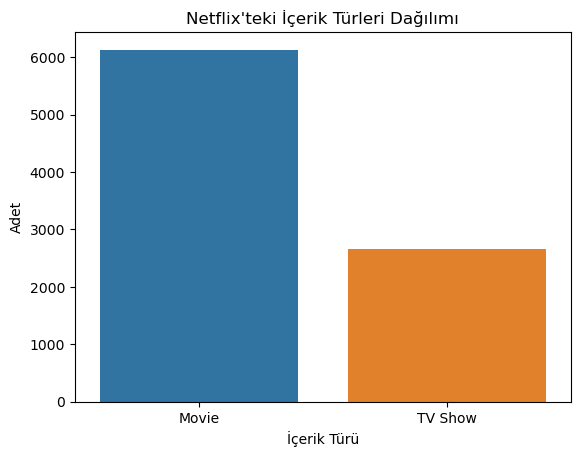

In [15]:
sns.countplot(x="type", data=df1)
plt.title("Netflix'teki İçerik Türleri Dağılımı")
plt.xlabel("İçerik Türü")
plt.ylabel("Adet")
plt.show()

Netflix'de film sayısı, TV show sayısından fazladır.

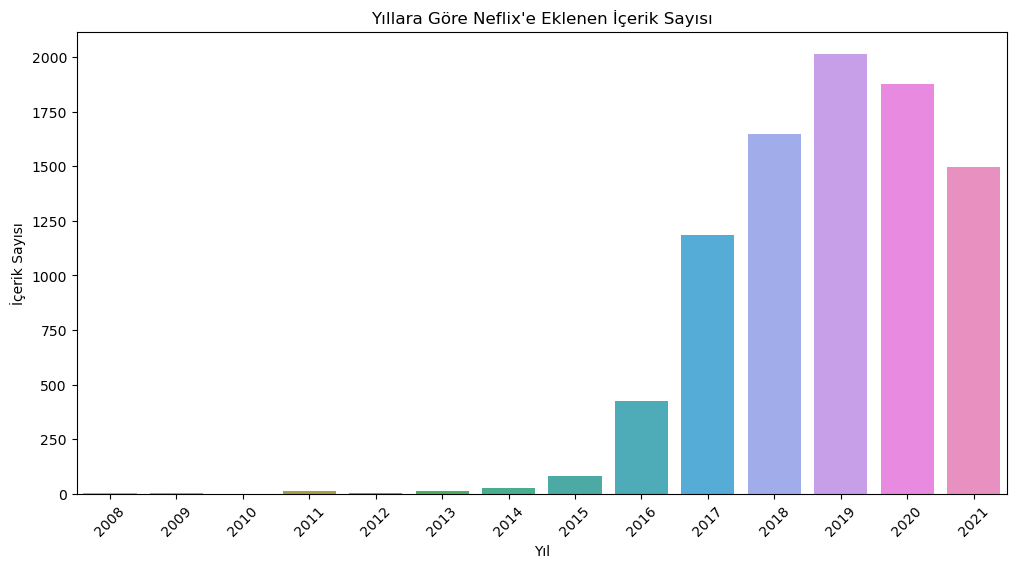

In [16]:
df1["date_added"] = df1["date_added"].str.strip()
df1["date_added"] = pd.to_datetime(df1["date_added"], errors="coerce")
df1["year_added"] = df1["date_added"].dt.year

plt.figure(figsize=(12,6))
sns.countplot(data=df1, x="year_added", order=sorted(df1["year_added"].dropna().unique()))
plt.title("Yıllara Göre Neflix'e Eklenen İçerik Sayısı")
plt.xlabel("Yıl")
plt.ylabel("İçerik Sayısı")
plt.xticks(rotation=45)
plt.show()

Netflix'e eklenen içerik sayısı 2013'den sonra yıllar geçtikçe artmıştır. 2019 senesi en fazla içerik eklenen sene olmuştur. Daha sonraki senelerde eklenen içerik sayıları azalmıştır. 

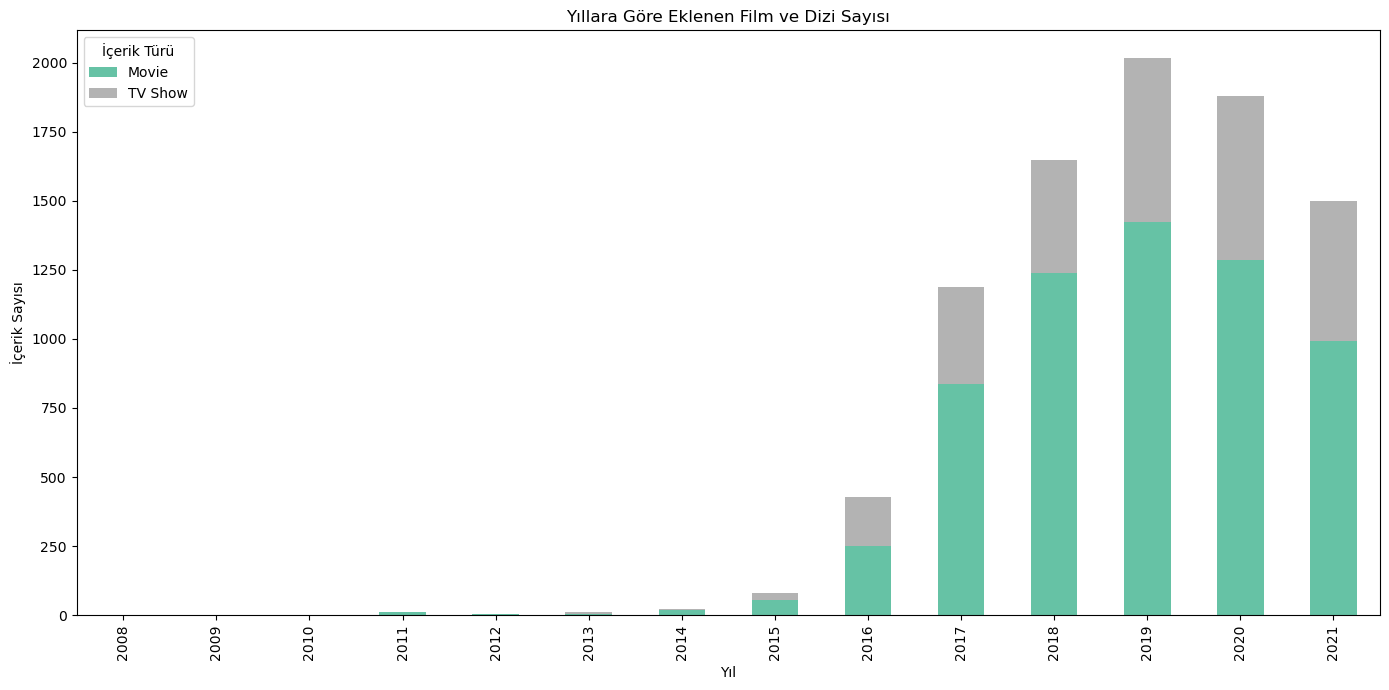

In [17]:
type_year = df1.dropna(subset=["year_added"])
type_year = type_year.groupby(["year_added", "type"]).size().unstack(fill_value=0)

type_year.plot(kind="bar", stacked=True, figsize=(14,7), colormap="Set2")
plt.title("Yıllara Göre Eklenen Film ve Dizi Sayısı")
plt.xlabel("Yıl")
plt.ylabel("İçerik Sayısı")
plt.legend(title="İçerik Türü")
plt.tight_layout()
plt.show()

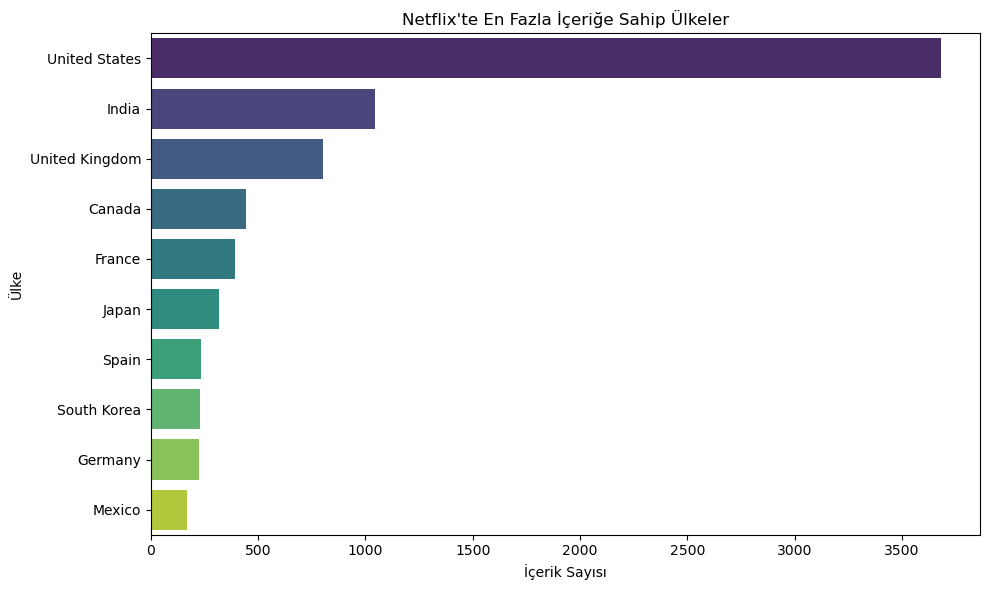

In [18]:
df_countries = df1.dropna(subset=["country"])
df_countries = df_countries.assign(country=df_countries["country"].str.split(", "))
df_countries = df_countries.explode("country")

top_countries = df_countries["country"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Netflix'te En Fazla İçeriğe Sahip Ülkeler")
plt.xlabel("İçerik Sayısı")
plt.ylabel("Ülke")
plt.tight_layout()
plt.show()

En fazla içeriğe sahip ülkeler:
    1-ABD
    2-Hindistan
    3-Birleşik Krallık
    4-Kanada
    5-Fransa
    6-Japonya
    7-İspanya
    8-Güney Kore
    9-Almanya
    10-Meksika

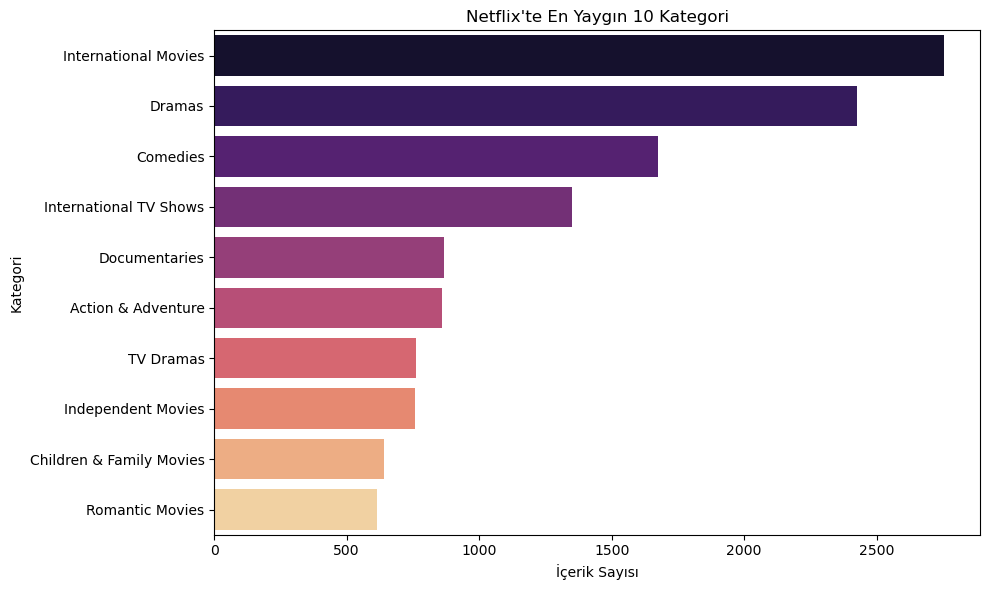

In [19]:
df_genre = df1.dropna(subset=["listed_in"])
df_genre = df_genre.assign(listed_in=df_genre["listed_in"].str.split(", "))
df_genre = df_genre.explode("listed_in")

top_genres = df_genre["listed_in"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="magma")
plt.title("Netflix'te En Yaygın 10 Kategori")
plt.xlabel("İçerik Sayısı")
plt.ylabel("Kategori")
plt.tight_layout()
plt.show()

Netflix'in en yaygın kategorileri:
    1-Uluslararası Filmler
    2-Drama
    3-Komedi
    4-Uluslararası TV Showları
    5-Belgeseller
    6-Aksiyon ve Macera
    7-TV Dramaları
    8-Bağımsız Filmler
    9-Çocuk ve Aile Filmleri
    10-Romantik Filmler